In [82]:
import requests
import numpy as np
import pandas as pd
import cmocean
import matplotlib.pylab as plt
from matplotlib import cm
import matplotlib.dates as mdates
# from scipy.interpolate import griddata
# from scipy import interpolate
from datetime import datetime
import cartopy.crs as ccrs

### Let's create a function to upload TC data

In [83]:
def get_TCs_byDate(startDate,endDate):
    url = 'https://argovis.colorado.edu/tc/findByDateRange?startDate='+startDate+'T00:00:00&endDate='+endDate+'T00:00:00' #2018-07-15
    print(url)
    resp = requests.get(url)
    # Consider any status other than 2xx an error
    if not resp.status_code // 100 == 2:
        return "Error: Unexpected response {}".format(resp)
    data = resp.json()
    return data

In [84]:
TCs_Dict = get_TCs_byDate(startDate='2017-12-20',endDate='2018-02-15') #startDate='2018-07-15',endDate='2018-09-15')
print(type(TCs_Dict))
print(type(TCs_Dict[0]))
TCs_Dict[0].keys()

https://argovis.colorado.edu/tc/findByDateRange?startDate=2017-12-20T00:00:00&endDate=2018-02-15T00:00:00
<class 'list'>
<class 'dict'>


dict_keys(['_id', 'name', 'num', 'source', 'year', 'startDate', 'endDate', 'traj_data'])

In [85]:
TCs_Dict[0]['traj_data']

[{'timestamp': '2018-02-14T06:00:00.000Z',
  'lon': 138.449203,
  'lat': -8.750912,
  'intensity': 1.769272,
  'year': 2018,
  'time': 600,
  'class': 'Southern Hemisphere Cylone',
  'pres': 0,
  'wind': 0,
  'geoLocation': {'type': 'point', 'coordinates': [138.449203, -8.750912]}},
 {'timestamp': '2018-02-14T12:00:00.000Z',
  'lon': 138.052002,
  'lat': -8.890801,
  'intensity': 1.584687,
  'year': 2018,
  'time': 1200,
  'class': 'Southern Hemisphere Cylone',
  'pres': 0,
  'wind': 0,
  'geoLocation': {'type': 'point', 'coordinates': [138.052002, -8.890801]}},
 {'timestamp': '2018-02-14T18:00:00.000Z',
  'lon': 138.306488,
  'lat': -8.774257,
  'intensity': 1.827835,
  'year': 2018,
  'time': 1800,
  'class': 'Southern Hemisphere Cylone',
  'pres': 0,
  'wind': 0,
  'geoLocation': {'type': 'point', 'coordinates': [138.306488, -8.774257]}},
 {'timestamp': '2018-02-15T00:00:00.000Z',
  'lon': 136.400375,
  'lat': -9.921179,
  'intensity': 1.899527,
  'year': 2018,
  'time': 0,
  'class

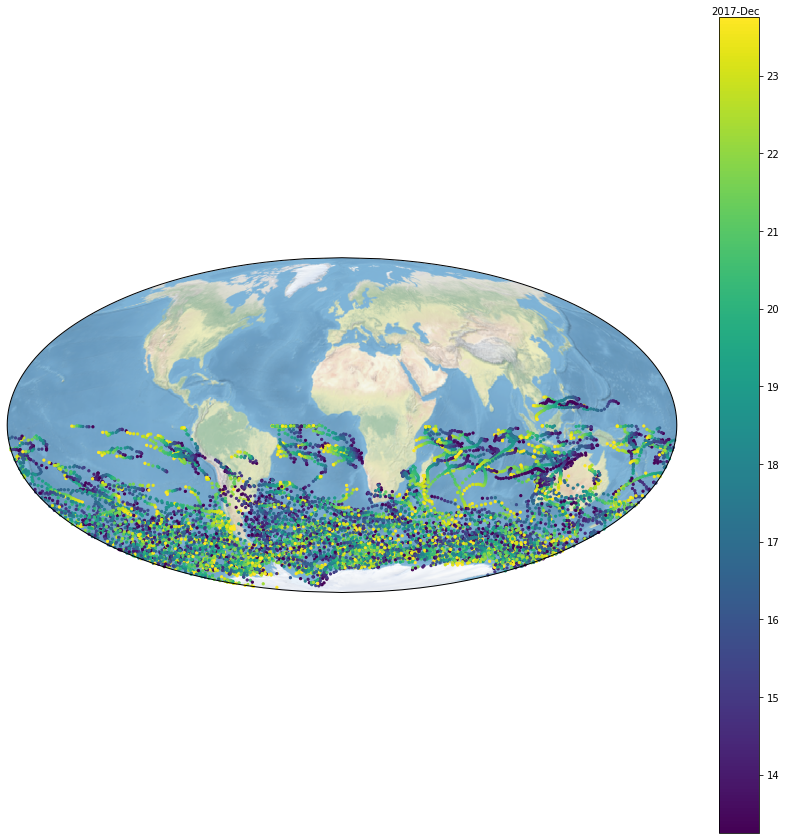

In [86]:
fig = plt.figure(figsize=(15,15))

ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()

for i in range(0,len(TCs_Dict)):
    df  = pd.DataFrame(TCs_Dict[i]['traj_data'])
    dti = pd.to_datetime(df['timestamp'])
    #plt.plot(df['lon'],df['lat'],transform=ccrs.Geodetic(),c='k')
    plt.scatter(df['lon'],df['lat'],transform=ccrs.Geodetic(),s=5,c=mdates.date2num(dti))
cb = plt.colorbar()
loc = mdates.AutoDateLocator()
cb.ax.yaxis.set_major_locator(loc)
cb.ax.yaxis.set_major_formatter(mdates.ConciseDateFormatter(loc))
plt.show()



For each month of each year of interest: 1. download Argo metadata; 2. for each day of the month of interest a. query storms, b. check each storm location to see if there are pairs of floats nearby (in space and time), c. store metadata for relevant pairs (along with storm location and type), including which bgc variables are available; 3. check how many and where suitable pairs of Argo profiles are there and which ones have bgc

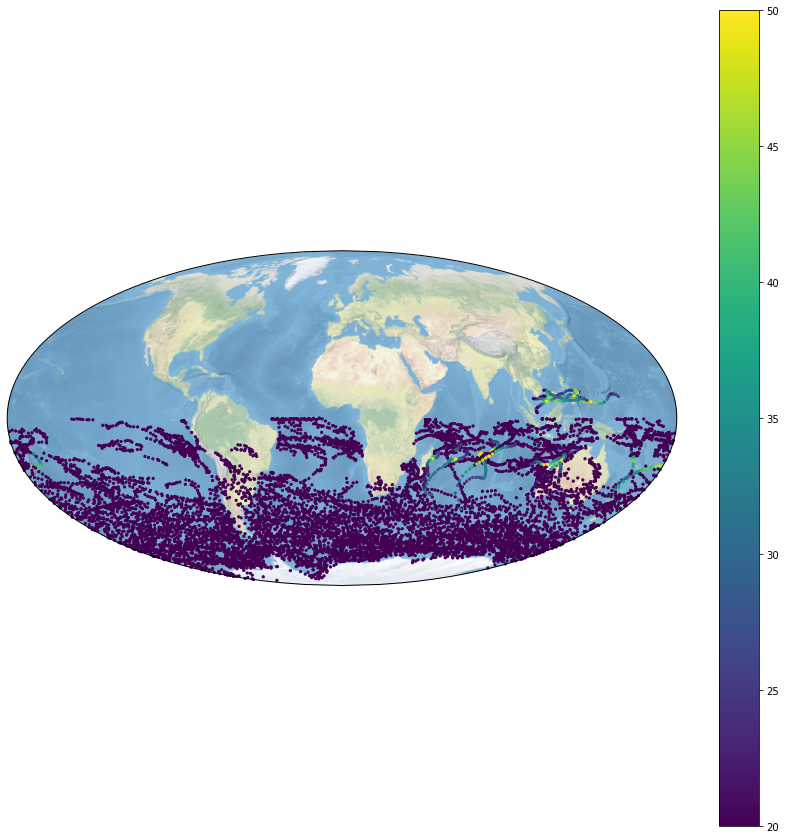

In [90]:
fig = plt.figure(figsize=(15,15))

ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()

for i in range(0,len(TCs_Dict)):
    df  = pd.DataFrame(TCs_Dict[i]['traj_data'])
    dti = pd.to_datetime(df['timestamp'])
    #plt.plot(df['lon'],df['lat'],transform=ccrs.Geodetic(),c='k')
    plt.scatter(df['lon'],df['lat'],transform=ccrs.Geodetic(),s=5,c=df['wind'])
cb = plt.colorbar()
plt.show()

In [89]:
df

,date,time,l,class,lat,lon,wind,press,year,timestamp,geoLocation
0,2018-02-13,3100,,DB,-13.1,131.2,15,1006,2018,2018-02-13T18:00:00.000Z,"{'type': 'point', 'coordinates': [131.2, -13.1]}"
1,2018-02-14,4000,,DB,-13.5,130.0,15,1005,2018,2018-02-14T00:00:00.000Z,"{'type': 'point', 'coordinates': [130, -13.5]}"
2,2018-02-14,4000,,DB,-14.0,129.0,20,1004,2018,2018-02-14T06:00:00.000Z,"{'type': 'point', 'coordinates': [129, -14]}"
3,2018-02-14,4100,,TD,-14.5,128.3,25,1003,2018,2018-02-14T12:00:00.000Z,"{'type': 'point', 'coordinates': [128.3, -14.5]}"
4,2018-02-14,4100,,TD,-14.9,126.8,25,1003,2018,2018-02-14T18:00:00.000Z,"{'type': 'point', 'coordinates': [126.8, -14.9]}"
5,2018-02-15,5000,,TD,-15.2,126.1,25,1003,2018,2018-02-15T00:00:00.000Z,"{'type': 'point', 'coordinates': [126.1, -15.2]}"
6,2018-02-15,5000,,TD,-16.1,125.5,25,1002,2018,2018-02-15T06:00:00.000Z,"{'type': 'point', 'coordinates': [125.5, -16.1]}"
7,2018-02-15,5100,,TD,-16.8,124.5,25,1002,2018,2018-02-15T12:00:00.000Z,"{'type': 'point', 'coordinates': [124.5, -16.8]}"
8,2018-02-15,5100,,TD,-17.2,123.2,25,1001,2018,2018-02-15T18:00:00.000Z,"{'type': 'point', 'coordinates': [123.2, -17.2]}"
9,2018-02-16,6000,,TD,-17.5,122.4,25,1000,2018,2018-02-16T00:00:00.000Z,"{'type': 'point', 'coordinates': [122.4, -17.5]}"
